In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
bos["Medv"] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Exploratary Data analysis
def check_nullvalues(df):
    for i in df.columns:
        print(f"{i} has {df[i].isnull().sum()} null values")

check_nullvalues(bos)

CRIM has 0 null values
ZN has 0 null values
INDUS has 0 null values
CHAS has 0 null values
NOX has 0 null values
RM has 0 null values
AGE has 0 null values
DIS has 0 null values
RAD has 0 null values
TAX has 0 null values
PTRATIO has 0 null values
B has 0 null values
LSTAT has 0 null values
Medv has 0 null values


In [5]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


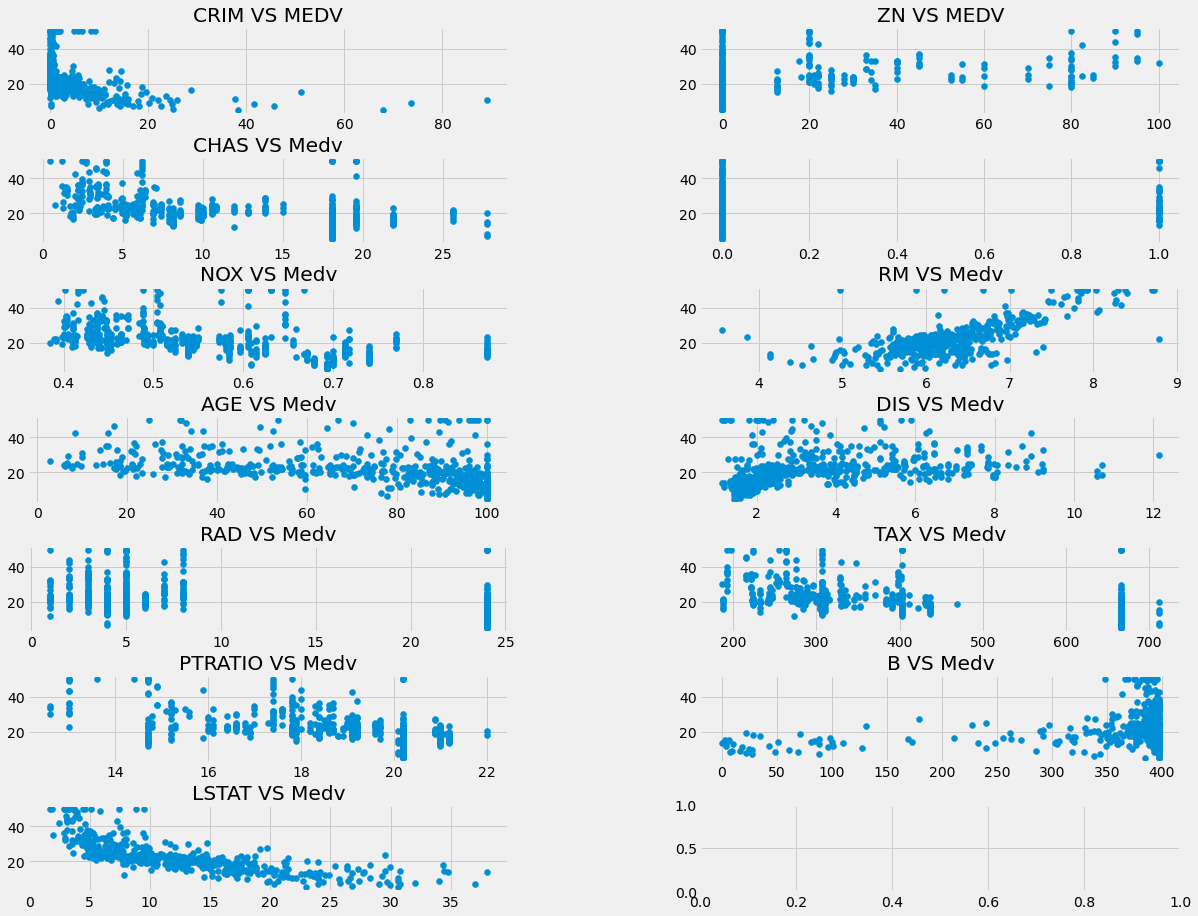

In [6]:
# let's check the correlation between each of the feature with target feature and it's disribution
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(20,15))
axs[0, 0].scatter(bos["CRIM"], bos["Medv"])
axs[0, 0].set_title("CRIM VS MEDV")

axs[0, 1].scatter(bos["ZN"], bos["Medv"])
axs[0, 1].set_title("ZN VS MEDV")

axs[1, 0].scatter(bos["INDUS"], bos["Medv"])
axs[1, 0].set_title("INDUS VS Medv")

axs[1, 1].scatter(bos["CHAS"], bos["Medv"])
axs[1, 0].set_title("CHAS VS Medv")

axs[2, 0].scatter(bos["NOX"], bos["Medv"])
axs[2, 0].set_title("NOX VS Medv")

axs[2, 1].scatter(bos["RM"], bos["Medv"])
axs[2, 1].set_title("RM VS Medv")

axs[3, 0].scatter(bos["AGE"], bos["Medv"])
axs[3, 0].set_title("AGE VS Medv")

axs[3, 1].scatter(bos["DIS"], bos["Medv"])
axs[3, 1].set_title("DIS VS Medv")

axs[4, 0].scatter(bos["RAD"], bos["Medv"])
axs[4, 0].set_title("RAD VS Medv")

axs[4, 1].scatter(bos["TAX"], bos["Medv"])
axs[4, 1].set_title("TAX VS Medv")

axs[5, 0].scatter(bos["PTRATIO"], bos["Medv"])
axs[5, 0].set_title("PTRATIO VS Medv")

axs[5, 1].scatter(bos["B"], bos["Medv"])
axs[5, 1].set_title("B VS Medv")

axs[6, 0].scatter(bos["LSTAT"], bos["Medv"])
axs[6, 0].set_title("LSTAT VS Medv")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)

plt.show()


In [7]:
# split the data into dependent and independent features
x = bos.drop(["Medv"], axis=1)
y = bos["Medv"]

print(f"{x.shape}, {y.shape}")

(506, 13), (506,)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
print(f"{x_train.shape}, {x_test.shape}")

(404, 13), (102, 13)


In [46]:
# start with a baseline model
linear_red = LinearRegression()
linear_red.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# calculate r2 and adjusted r2
r2 = linear_red.score(x_train,y_train)
def adjusted_r2(x, y):
    residual = r2
    n = x.shape[0]
    p = x.shape[1]
    adjusted_score = (1) - (1 - residual) * (n - 1) / (n - p - 1)
    return adjusted_score

adjusted_r2 = adjusted_r2(x_train, y_train)
print(f"The r2 and adjusted_r2 scores are {r2} and {adjusted_r2}")

The r2 and adjusted_r2 scores are 0.7337332767917557 and 0.7248577193514809


In [13]:
# Basemodel with Gradient descent approcah
sgd_reg = SGDRegressor()
sgd_reg.fit(x_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [15]:
# calculate r2 and adjusted r2
def calculate_metrics(x, y):
    y_pred = sgd_reg.predict(x)
    return mean_squared_error(y, y_pred)

print(calculate_metrics(x_train, y_train))


5.101620091938763e+27


In [17]:
# fit the scaled images to the model
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(x_train)
xtest_scaled = scaler.transform(x_test)


In [43]:
lr_model = LinearRegression()
lr_model.fit(xtrain_scaled, y_train)
lr_model.score(xtest_scaled, y_test)

0.7555033086871304

In [21]:
lr_model.predict([xtrain_scaled[3]])

array([16.04200939])

In [22]:
lr_sgd = SGDRegressor()
lr_sgd.fit(xtrain_scaled, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [23]:
lr_sgd.predict([xtrain_scaled[3]])

array([16.00913911])

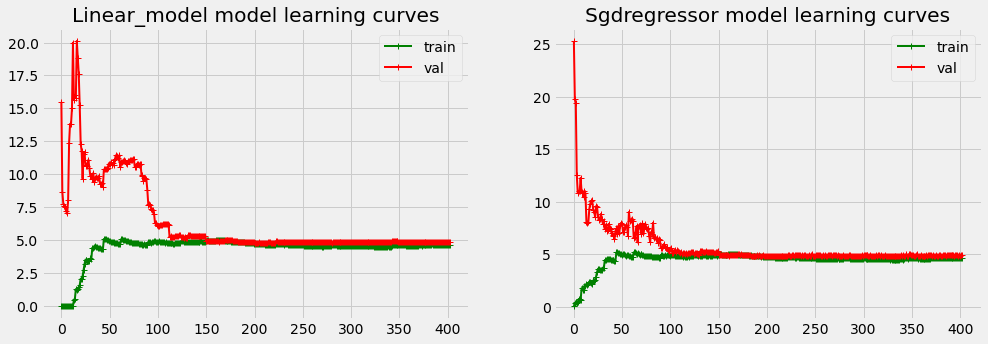

In [41]:
# plot learning curves of both the models
def plot_learning_curves(model, xtrain_scaled, y_train, xtest_scaled, y_test, name):
    train_errors = []
    val_errors = []
    for m in range(1, len(xtrain_scaled)):
        model.fit(xtrain_scaled[:m], y_train[:m])
        y_train_predict = model.predict(xtrain_scaled[:m])
        y_val_predict = model.predict(xtest_scaled)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_test, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train", color="green")
    plt.plot(np.sqrt(val_errors), "r-+", linewidth=2, label="val", color="red")
    plt.title(f"{name} model learning curves")
    plt.legend()

plt.figure(figsize=(15, 5))
for i in range(2):
    models = [lr_model, lr_sgd]
    names = ["Linear_model", "Sgdregressor"]
    plt.subplot(1, 2, i + 1)
    plot_learning_curves(models[i], xtrain_scaled, y_train, xtest_scaled, y_test, names[i])
plt.show()

In [45]:
# save the model
pickle.dump(linear_red, open('lr_model.pickle', 'wb'))